In [2]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
import sklearn

sklearn.set_config(transform_output="pandas", display='diagram')

import warnings
warnings.filterwarnings("ignore")

In [3]:
url = "https://github.com/k5yi/econ2005/blob/master/datasets/water_melon.xlsx?raw=True"
col_names = ['Year', 'q', 'h', 'p', 'p_c', 'p_v', 'w', 'n', 'y/n', 'p_f']

data = pd.read_excel(url, sheet_name="Sheet1", names=col_names)

In [4]:
data['ww2'] = np.where((data['Year'] >= 1943) & (data['Year'] <= 1946), 1, 0)
data['cotton'] = np.where((data['Year'] >= 1934), 1, 0)
data

,Year,q,h,p,p_c,p_v,w,n,y/n,p_f,ww2,cotton
0,1930,4.448623,4.379545,4.761777,2.247338,0.845054,3.366401,4.812434,6.403531,2.535163,0,0
1,1931,4.356519,4.333493,4.614410,1.733858,2.726278,3.136141,4.819342,6.244651,2.546676,0,0
2,1932,4.204548,4.054879,4.368032,1.874316,2.588122,2.832198,4.826250,5.966037,2.599635,0,0
3,1933,4.031853,4.008827,4.531517,2.318718,2.286482,2.772330,4.833157,5.896959,2.645687,0,0
4,1934,4.096325,4.094023,4.644344,2.514439,1.475967,2.917394,4.840065,6.018996,2.624964,0,1
5,1935,4.195337,4.156193,4.563753,2.406217,1.892737,2.970354,4.844670,6.129521,2.710160,0,1
6,1936,4.135470,4.128562,4.851578,2.514439,1.897342,2.995683,4.853881,6.246954,2.703252,0,1
7,1937,4.262113,4.225271,4.662765,2.129905,2.079248,3.113115,4.858486,6.311427,2.705555,0,1
8,1938,4.259810,4.202245,4.690396,2.150628,3.044037,3.090089,4.865394,6.226230,2.753910,0,1
9,1939,4.144680,4.137772,4.777895,2.208193,1.701621,3.113115,4.874604,6.288401,2.691739,0,1


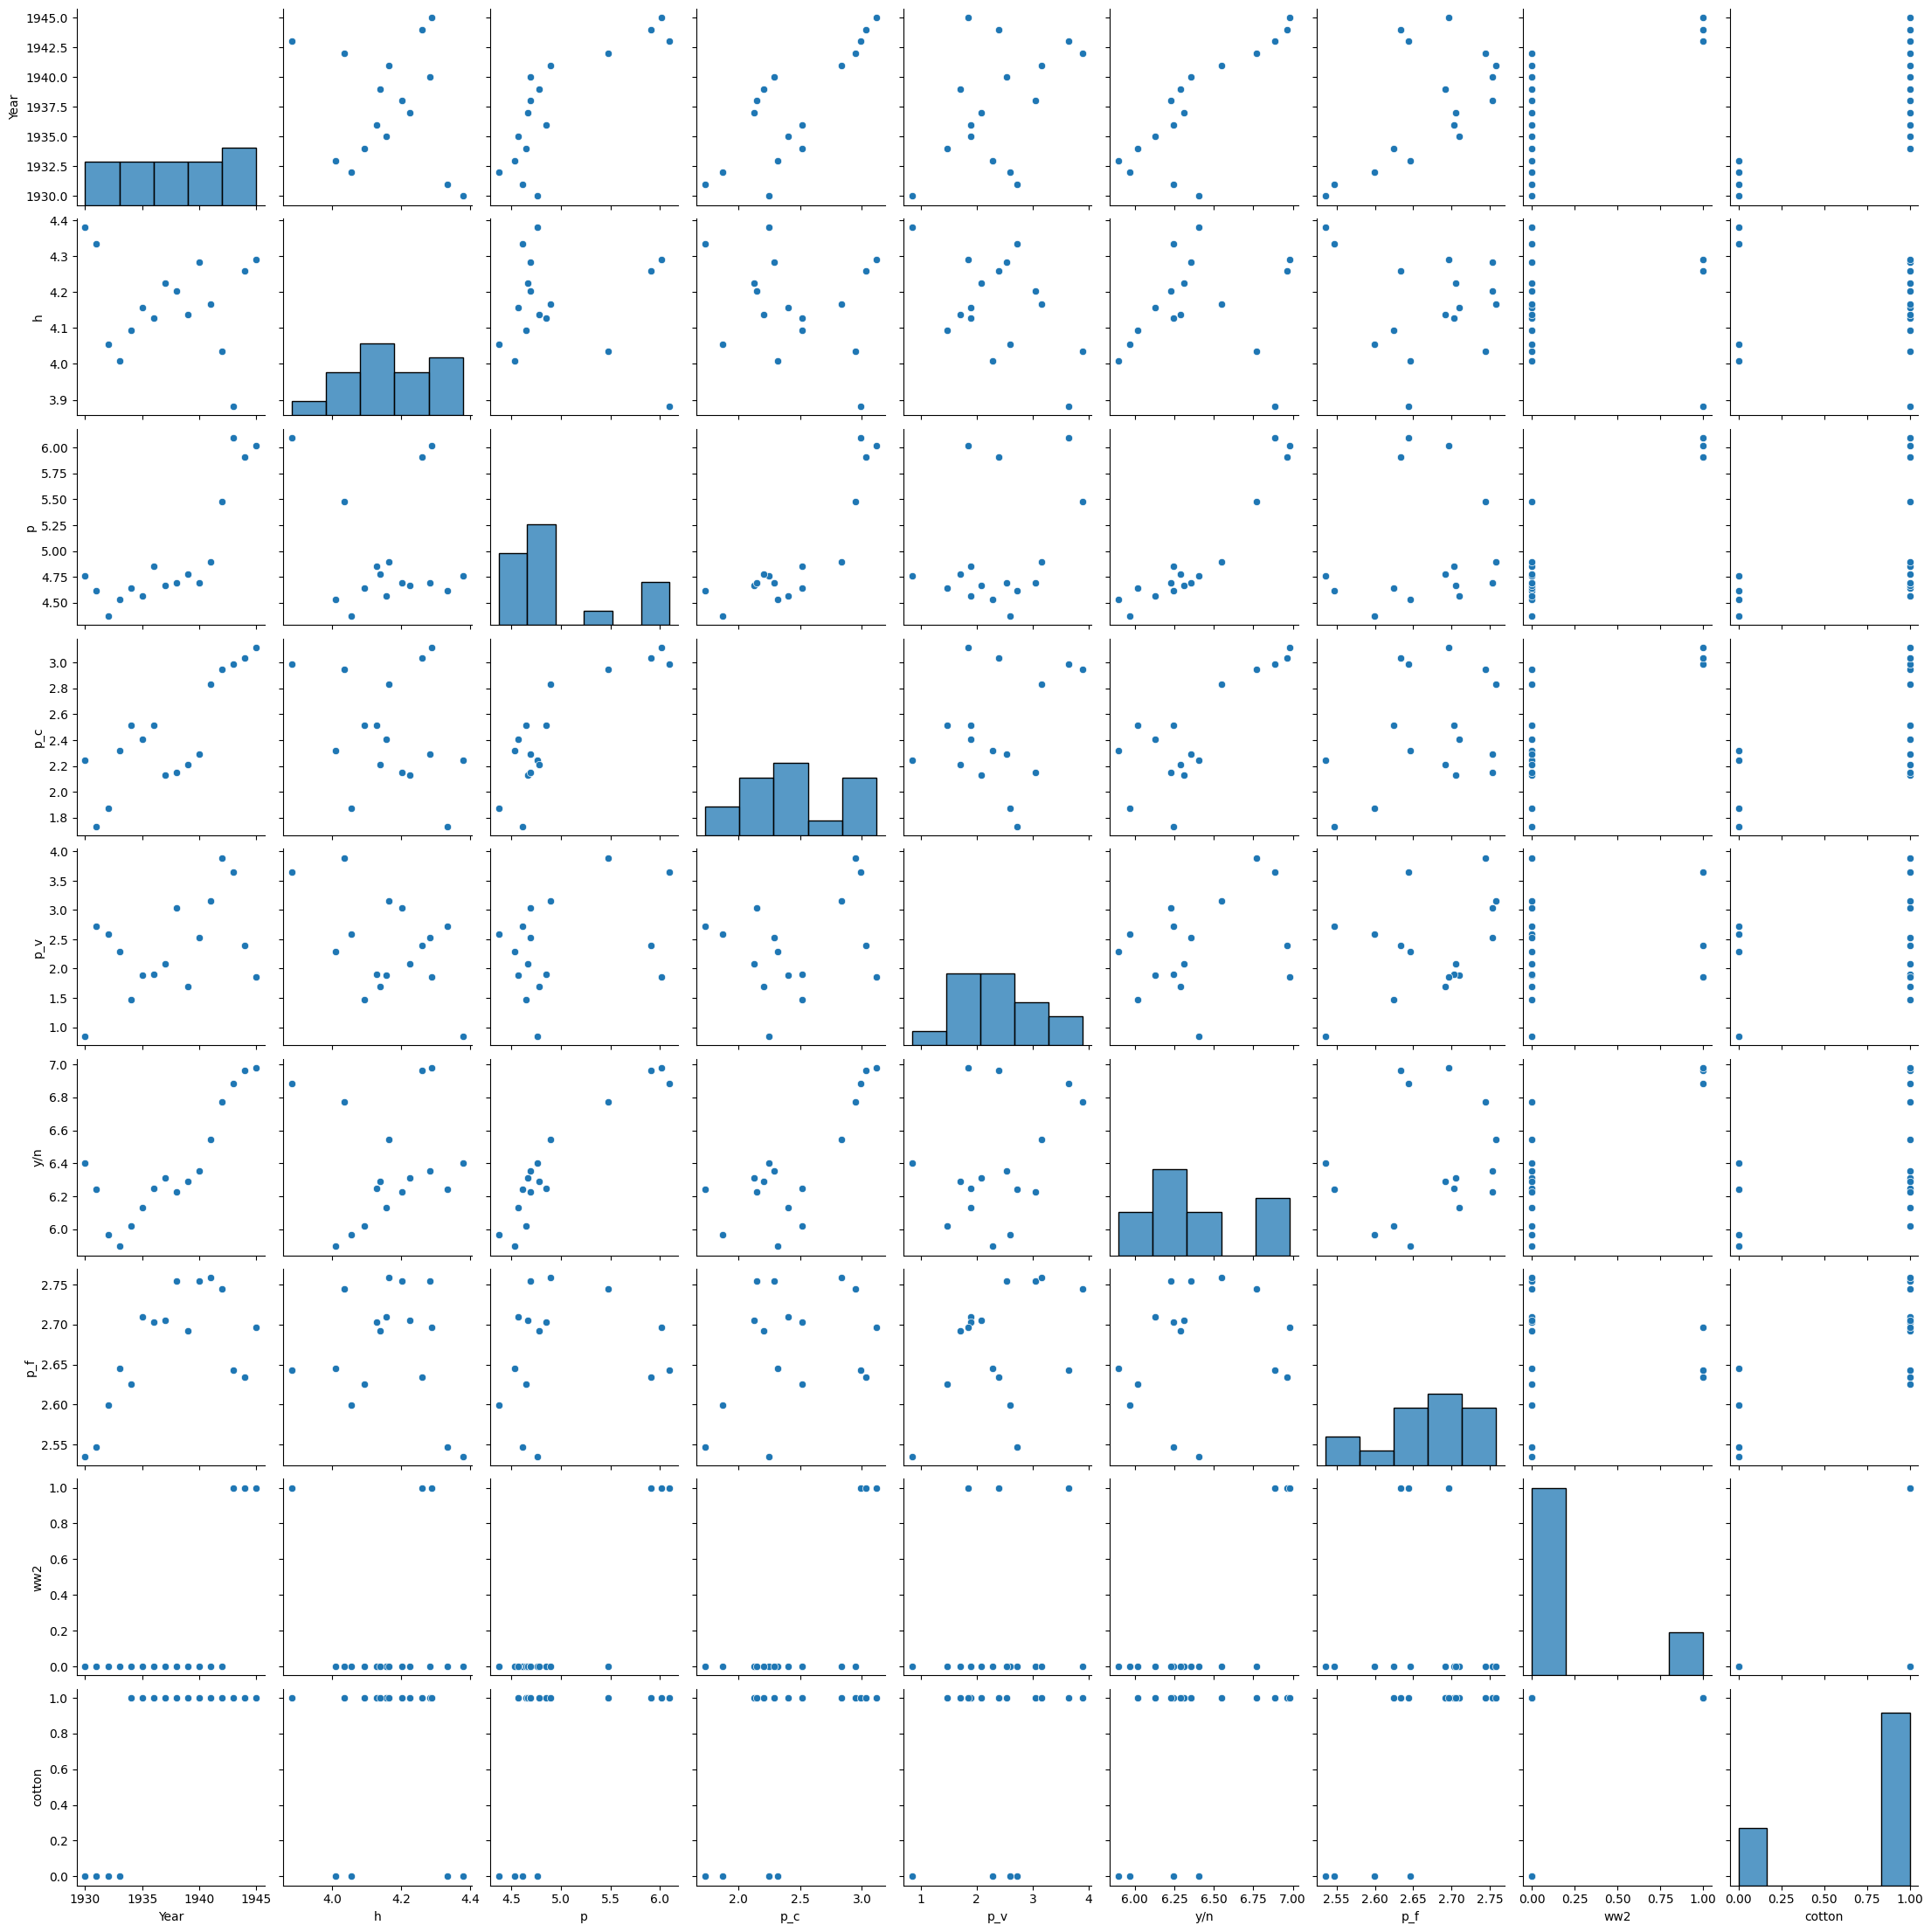

In [129]:
x_train = data[data['Year'] <= 1945].drop(columns=['q', 'n', 'w'])
y_train = data[data['Year'] <= 1945]['q']
x_test = data[(data['Year'] >= 1946) & (data['Year'] <= 1950)].drop(columns=['q', 'n', 'w'])
y_test = data[(data['Year'] >= 1946) & (data['Year'] <= 1950)]['q']

import seaborn as sns

sns.pairplot(x_train)

In [130]:
train = pd.concat([x_train, y_train], axis=1)
formula = 'q ~ 1 + y/n + h + p + p_c + w +p_f + C(ww2) + C(cotton)'
# formula = 'q ~ 1 + h + p + p_c + p_v + w +p_f + C(ww2) + C(cotton)'

In [131]:
from linearmodels.iv import IV2SLS

model = IV2SLS.from_formula(formula, train).fit()
model

OLS Estimation Summary                            
==============================================================================
Dep. Variable:                      q   R-squared:                      0.9635
Estimator:                        OLS   Adj. R-squared:                 0.9391
No. Observations:                  16   F-statistic:                    1338.3
Date:                Sun, Sep 24 2023   P-value (F-stat)                0.0000
Time:                        11:59:25   Distribution:                  chi2(6)
Cov. Estimator:                robust                                         
                                                                              
                               Parameter Estimates                                
==================================================================================
                Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
----------------------------------------------------------------------------------
Intercept         -0.2277     0.2505    -0.9089     0.3634     -0.7186      0.2633
h                  0.9921     0.0591     16.779     0.0000      0.8762      1.1080
p                 -0.0377     0.0410    -0.9201     0.3575     -0.1181      0.0426
p_c               -0.0450     0.0375    -1.1993     0.2304     -0.1184      0.0285
p_f                0.2290     0.1440     1.5897     0.1119     -0.0533      0.5113
C(ww2)[T.1]        0.0621     0.0458     1.3553     0.1753     -0.0277      0.1518
C(cotton)[T.1]    -0.0468     0.0345    -1.3566     0.1749     -0.1144      0.0208
==================================================================================
OLSResults, id: 0x2b8b16fd0

In [132]:
from sklearn.linear_model import LinearRegression

res = LinearRegression()
res.fit(x_train, y_train)
res.score(x_train, y_train)

0.9711664021987266

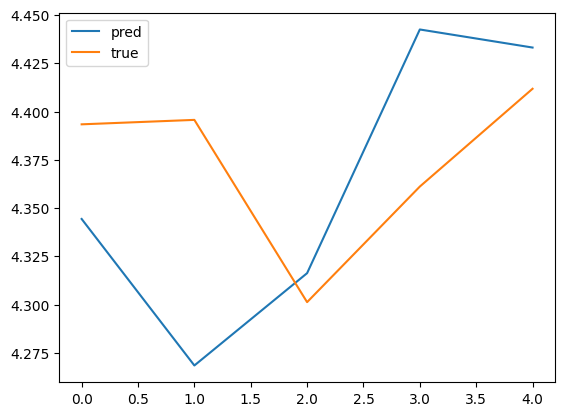

In [145]:
y_pred = res.predict(x_test)
residuals = y_test - y_pred

# plt.scatter(x_test['Year'], residuals)
# plt.show()

plt.plot(np.array(res.predict(x_test)),label = "pred")
plt.plot(np.array(y_test),label = "true")
plt.legend()
plt.show()